# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [2]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
# df = pd.read_csv('Elmshorn_PV.csv', sep=";", decimal=",", header=0)
df = pd.read_csv('Dobersdorf_PV.csv', sep=";", decimal=",", header=0)

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 842
Number of features: 20
Example data:
   Tag  Monat  Jahr  Produktion(kWH)       Tavg  Tmin  Tmax        Hum  \
0   16      7  2023            55.79  18.220833  15.8  22.1  74.916667   
1   17      7  2023            54.63  16.383333  12.4  19.4  78.750000   
2   18      7  2023            65.68  16.704167  11.8  21.6  73.541667   
3   19      7  2023            28.26  14.712500  12.7  17.2  85.625000   
4   20      7  2023            58.93  14.916667  10.7  19.4  76.500000   

        VPD  Prec  Pbin      Wspd  Wmax        Wdir       Cld     Sol   Sun  \
0  0.561647   0.8     1  4.445833   7.0  219.518655  6.125000  1991.0   7.7   
1  0.424523   7.0     1  3.929167   6.0  236.857639  6.041667  2102.0   7.0   
2  0.577180   0.0     1  2.941667   5.3  253.922480  5.416667  2578.0  12.4   
3  0.247361   2.9     1  1.820833   2.9  244.708336  7.291667  1121.0   1.8   
4  0.447118   0.3     1  3.625000   6.1  268.216749  3.708333  2456.0  12.0   

          Pres      

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Tag                0
Monat              0
Jahr               0
Produktion(kWH)    0
Tavg               0
Tmin               0
Tmax               0
Hum                0
VPD                0
Prec               0
Pbin               0
Wspd               0
Wmax               0
Wdir               0
Cld                0
Sol                2
Sun                2
Pres               0
Vis                0
Soil               2
dtype: int64

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


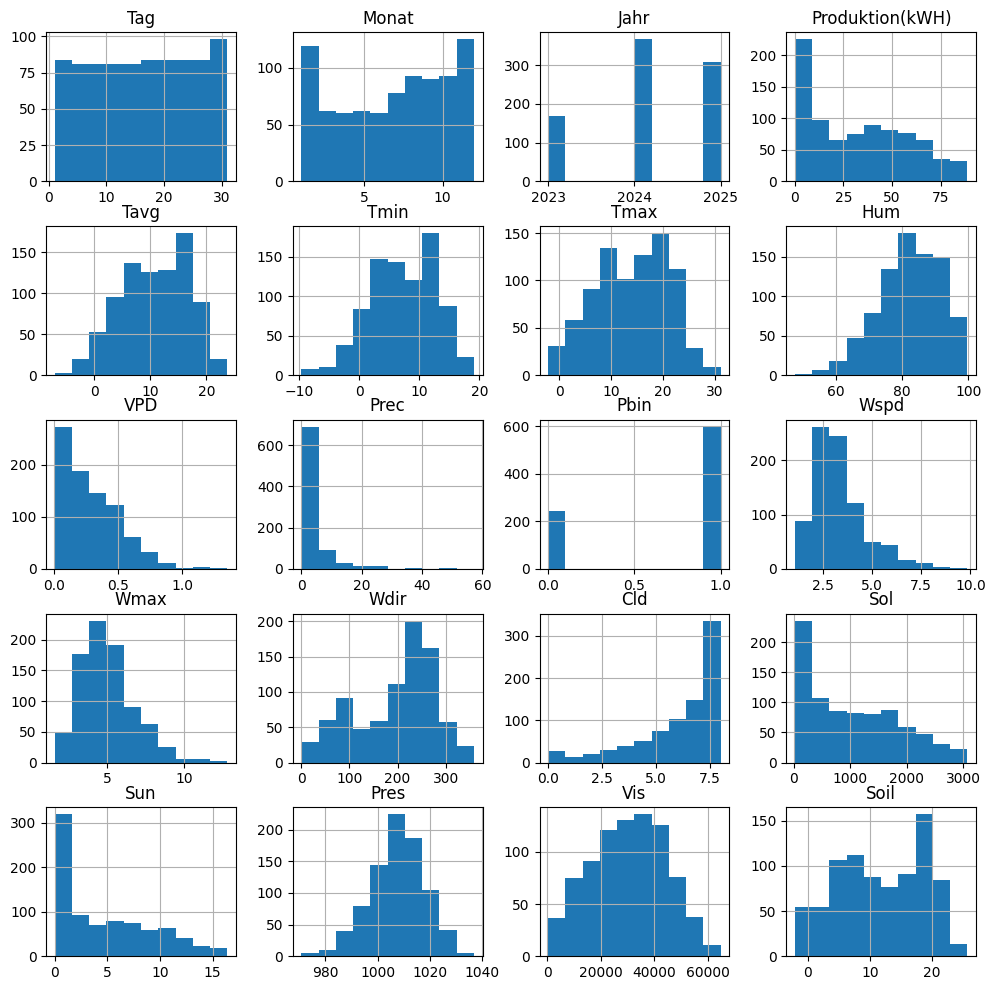

In [4]:
# Example: Plotting histograms of all numerical features
df.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


Data distribution by month:
Monat
1     62
2     57
3     62
4     60
5     62
6     60
7     78
8     93
9     90
10    93
11    63
12    62
Name: count, dtype: int64

Data distribution by year:
Jahr
2023    169
2024    366
2025    307
Name: count, dtype: int64

Production statistics:
count    842.000000
mean      32.927625
std       25.156106
min        0.000000
25%        8.237500
50%       31.230000
75%       53.290000
max       88.870000
Name: Produktion(kWH), dtype: float64

Zero/low production days: 240 out of 842

Mean production by month:
Monat
1      4.998871
2     12.333158
3     32.429032
4     48.200500
5     63.854839
6     59.352833
7     51.571795
8     49.906452
9     38.927667
10    17.342903
11     5.555714
12     2.565323
Name: Produktion(kWH), dtype: float64

Features with high missing values:
Sol     2
Sun     2
Soil    2
dtype: int64


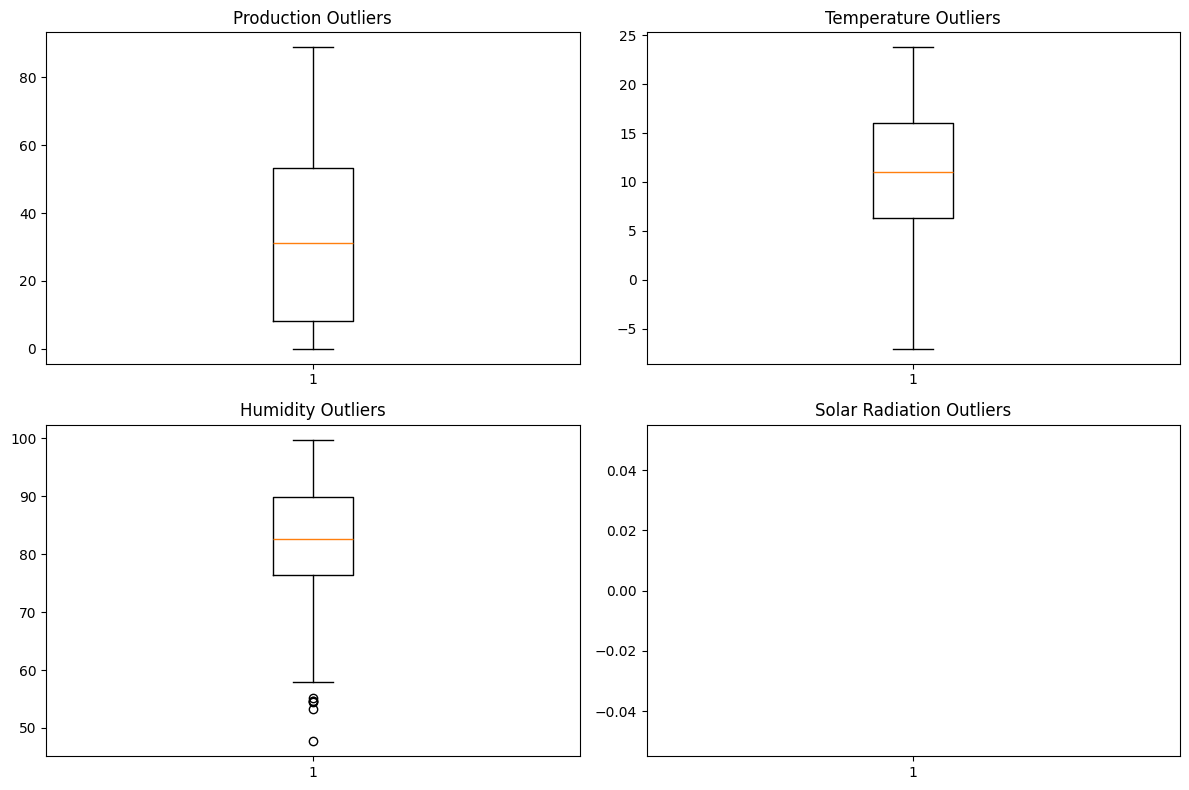

In [7]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here
# Check for temporal biases
print("Data distribution by month:")
print(df['Monat'].value_counts().sort_index())
print("\nData distribution by year:")
print(df['Jahr'].value_counts().sort_index())

# Check for production bias
print("\nProduction statistics:")
print(df['Produktion(kWH)'].describe())
print(f"\nZero/low production days: {(df['Produktion(kWH)'] < 10).sum()} out of {len(df)}")

# Check for seasonal bias in features
print("\nMean production by month:")
print(df.groupby('Monat')['Produktion(kWH)'].mean())

# Identify potential measurement biases
print("\nFeatures with high missing values:")
print(missing_values[missing_values > 0])

# Check for outliers that could indicate measurement errors
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].boxplot(df['Produktion(kWH)'])
axes[0, 0].set_title('Production Outliers')
axes[0, 1].boxplot(df['Tavg'])
axes[0, 1].set_title('Temperature Outliers')
axes[1, 0].boxplot(df['Hum'])
axes[1, 0].set_title('Humidity Outliers')
axes[1, 1].boxplot(df['Sol'])
axes[1, 1].set_title('Solar Radiation Outliers')
plt.tight_layout()
plt.show()


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


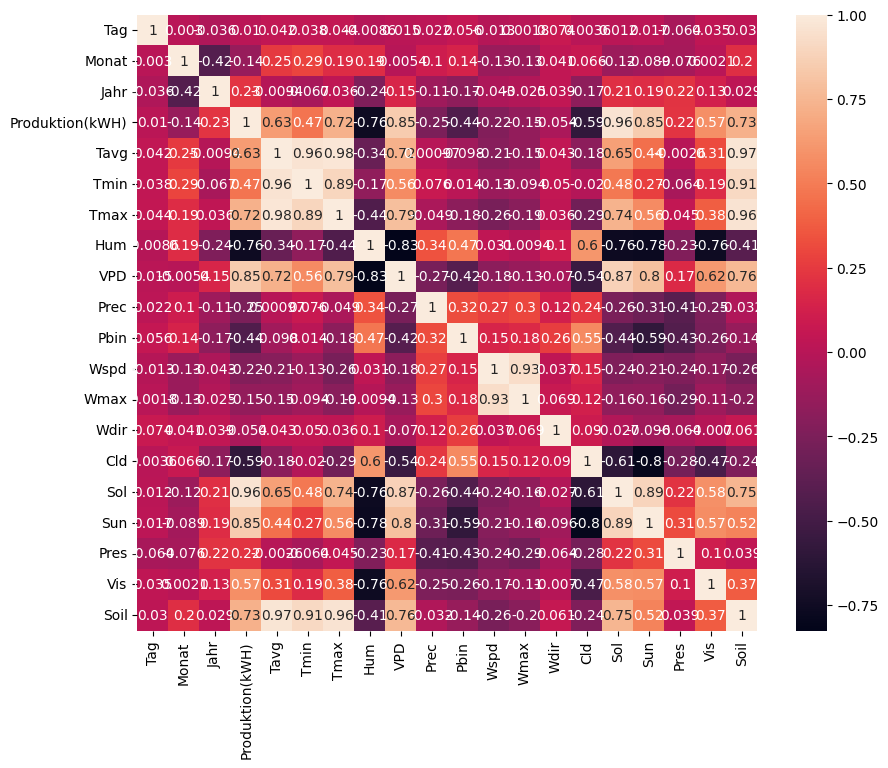

In [8]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()
